In [1]:
# Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [4]:
# Read Data

In [7]:
car_dataset = pd.read_csv('car_details.csv')

In [8]:
car_dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [9]:
car_dataset.shape

(301, 9)

In [10]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
car_dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [15]:
car_dataset['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [16]:
car_dataset['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [17]:
# Encoding categorical data

In [19]:
# Encoding fuel column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding Seller column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)

# Encoding fuel column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

C:\Users\ARTH\AppData\Local\Temp\ipykernel_21312\4063664357.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\ARTH\AppData\Local\Temp\ipykernel_21312\4063664357.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)
C:\Users\ARTH\AppData\Local\Temp\ipykernel_21312\4063664357.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [21]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [22]:
# Splittind Data and Label

In [23]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [24]:
X,Y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          0            0             0   
 1    2013           9.54       43000          1            0             0   
 2    2017           9.85        6900          0            0             0   
 3    2011           4.15        5200          0            0             0   
 4    2014           6.87       42450          1            0             0   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             0   
 297  2015           5.90       60000          0            0             0   
 298  2009          11.00       87934          0            0             0   
 299  2017          12.50        9000          1            0             0   
 300  2016           5.90        5464          0            0             0   
 
      Owner  
 0        0  
 1        0  
 2      

In [28]:
# Splitting Training and Testing Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [30]:
X.shape, X_train.shape, X_test.shape

((301, 7), (270, 7), (31, 7))

In [25]:
# Model Training

In [26]:
# 1 Linear Regression Model

In [27]:
lin_reg_model = LinearRegression()

In [31]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [33]:
# Linear Regression Model Evalution on train data

In [34]:
X_train_prediction = lin_reg_model.predict(X_train)

In [36]:
# R2 Error
error_score = metrics.r2_score(X_train_prediction,Y_train)
print("R2 Error : ",error_score)

R2 Error :  0.8635655509199314


In [37]:
# Visualtion of Actual Price and Predicted Price

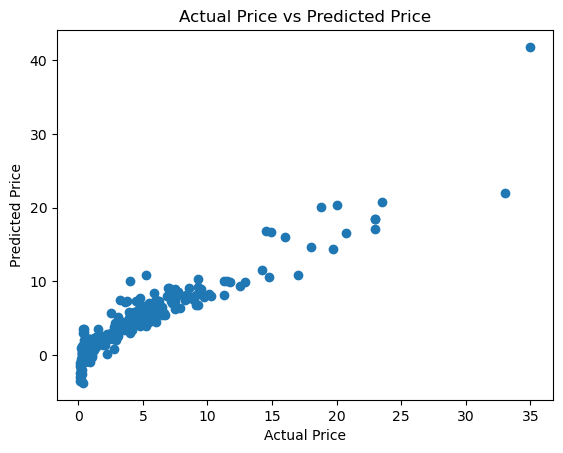

In [38]:
plt.scatter(Y_train,X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [39]:
# Linear Regression Model Evalution on test data

In [40]:
X_test_prediction = lin_reg_model.predict(X_test)

In [41]:
# R2 Error
error_score = metrics.r2_score(X_test_prediction,Y_test)
print("R2 Error : ",error_score)

R2 Error :  0.8062199941175402


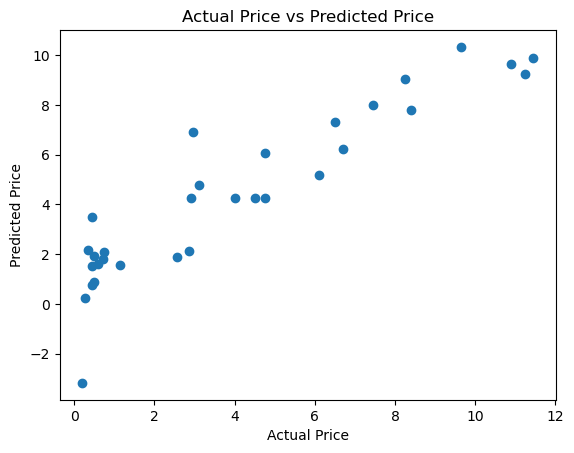

In [42]:
plt.scatter(Y_test,X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [43]:
# 2 Lasso Regression Model

In [44]:
lasso_reg_model = Lasso()

In [45]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [46]:
# Linear Regression Model Evalution on train data

In [47]:
X_train_prediction = lasso_reg_model.predict(X_train)

In [48]:
# R2 Error
error_score = metrics.r2_score(X_train_prediction,Y_train)
print("R2 Error : ",error_score)

R2 Error :  0.7984590240704248


In [49]:
# Visualtion of Actual Price and Predicted Price

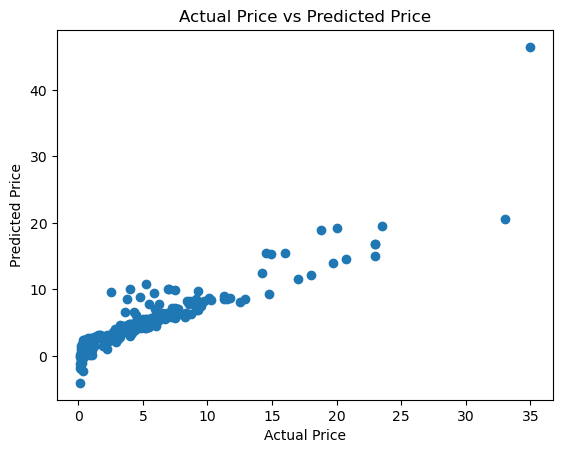

In [50]:
plt.scatter(Y_train,X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [51]:
# Linear Regression Model Evalution on test data

In [52]:
X_test_prediction = lasso_reg_model.predict(X_test)

In [53]:
# R2 Error
error_score = metrics.r2_score(X_test_prediction,Y_test)
print("R2 Error : ",error_score)

R2 Error :  0.7711110403265475


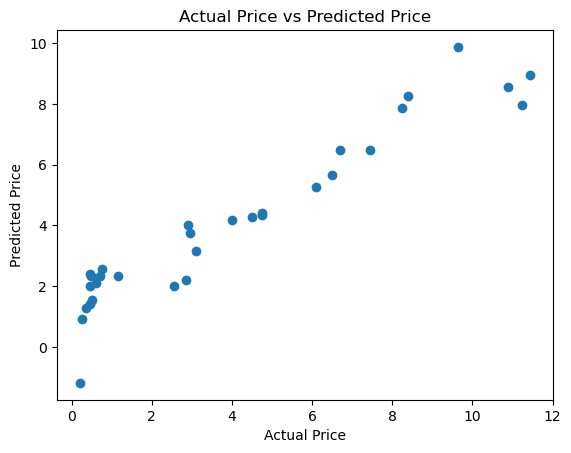

In [54]:
plt.scatter(Y_test,X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [55]:
# Here we train our model with both Linear regression and lasso regression and we find that lasso regression perfom better and predict accurate values.